# Importando dos dados



In [1]:
import pandas as pd


In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/alura-cursos/data_science_projeto/main/Dados/bicicletas.csv")

In [3]:
df.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,NaN,NaN,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,NaN,NaN,93.0,6.5,Céu limpo,Não,Sim,Inverno


In [4]:
df.columns

Index(['data_hora', 'contagem', 'temperatura', 'sensacao_termica', 'umidade',
       'velocidade_vento', 'clima', 'feriado', 'fim_de_semana', 'estacao'],
      dtype='object')

# Tratando dados nulos

In [5]:
df.shape

(17429, 10)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17429 entries, 0 to 17428
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_hora         17429 non-null  object 
 1   contagem          17429 non-null  int64  
 2   temperatura       17406 non-null  float64
 3   sensacao_termica  17406 non-null  float64
 4   umidade           17429 non-null  float64
 5   velocidade_vento  17429 non-null  float64
 6   clima             17429 non-null  object 
 7   feriado           17429 non-null  object 
 8   fim_de_semana     17429 non-null  object 
 9   estacao           17429 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 1.3+ MB


In [7]:
df.isnull().sum() #buscando os dados nulos (NaN)

data_hora            0
contagem             0
temperatura         23
sensacao_termica    23
umidade              0
velocidade_vento     0
clima                0
feriado              0
fim_de_semana        0
estacao              0
dtype: int64

In [8]:
df['temperatura'] = df['temperatura'].interpolate(method = 'linear') #Tratando os dados nulos com uma média entre os dois valores.
df['sensacao_termica'] = df['sensacao_termica'].interpolate(method = 'linear') #Tratando os dados nulos com uma média entre os dois valores.


In [9]:
df.head(10)

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno
5,2015-01-04 05:00:00,46,2.00,2.00,93.0,4.0,Céu limpo,Não,Sim,Inverno
6,2015-01-04 06:00:00,51,1.00,-1.00,100.0,7.0,Parcialmente nublado,Não,Sim,Inverno
7,2015-01-04 07:00:00,75,1.00,-1.00,100.0,7.0,Parcialmente nublado,Não,Sim,Inverno
8,2015-01-04 08:00:00,131,1.50,-1.00,96.5,8.0,Parcialmente nublado,Não,Sim,Inverno
9,2015-01-04 09:00:00,301,2.00,-0.50,100.0,9.0,Nublado,Não,Sim,Inverno


# Identificando e removendo dados duplicados


In [10]:
df.duplicated().sum()


15

In [11]:
duplicatas = df.duplicated(keep=False)
linhas_duplicadas = df[duplicatas]
linhas_duplicadas.sort_values(by='data_hora')

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
519,2015-01-25 16:00:00,1238,8.0,5.0,71.0,18.0,Nublado,Não,Sim,Inverno
17422,2015-01-25 16:00:00,1238,8.0,5.0,71.0,18.0,Nublado,Não,Sim,Inverno
869,2015-02-09 06:00:00,479,5.0,3.5,87.0,6.5,Parcialmente nublado,Não,Não,Inverno
17417,2015-02-09 06:00:00,479,5.0,3.5,87.0,6.5,Parcialmente nublado,Não,Não,Inverno
3655,2015-06-05 18:00:00,3411,23.0,23.0,50.0,26.0,Parcialmente nublado,Não,Não,Verão
17425,2015-06-05 18:00:00,3411,23.0,23.0,50.0,26.0,Parcialmente nublado,Não,Não,Verão
4167,2015-06-27 02:00:00,337,15.5,15.5,74.5,18.0,Parcialmente nublado,Não,Sim,Verão
17421,2015-06-27 02:00:00,337,15.5,15.5,74.5,18.0,Parcialmente nublado,Não,Sim,Verão
4658,2015-07-17 14:00:00,1882,24.5,24.5,44.0,29.5,Parcialmente nublado,Não,Não,Verão
17418,2015-07-17 14:00:00,1882,24.5,24.5,44.0,29.5,Parcialmente nublado,Não,Não,Verão


In [12]:
df_limpo = df.drop_duplicates() #removendo as linhas duplicadas

In [13]:
df_limpo.shape

(17414, 10)

# Obtendo estatísticas descritivas


In [14]:
df_limpo.describe()

,contagem,temperatura,sensacao_termica,umidade,velocidade_vento
count,17414.000000,17414.000000,17414.000000,17414.000000,17414.000000
mean,1143.101642,12.468206,11.521080,72.324954,15.913063
std,1085.108068,5.571670,6.614799,14.313186,7.894570
min,0.000000,-1.500000,-6.000000,20.500000,0.000000
25%,257.000000,8.000000,6.000000,63.000000,10.000000
50%,844.000000,12.500000,12.500000,74.500000,15.000000
75%,1671.750000,16.000000,16.000000,83.000000,20.500000
max,7860.000000,34.000000,34.000000,100.000000,56.500000


## Analisando as distribuições


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

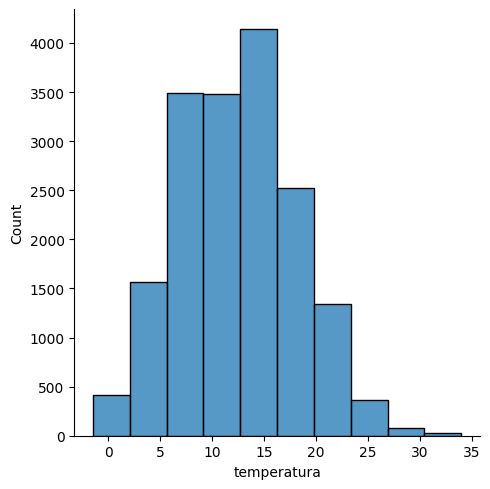

In [16]:
sns.displot(df_limpo, x='temperatura', bins=10)
plt.show()

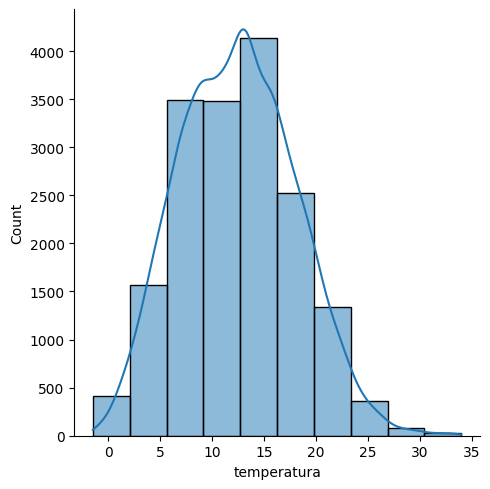

In [17]:
sns.displot(df_limpo, x='temperatura', bins=10, kde=True)
plt.show()


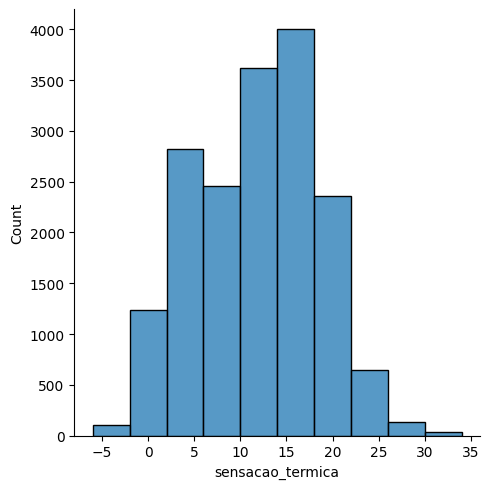

In [18]:
sns.displot(df_limpo, x='sensacao_termica', bins=10)
plt.show()

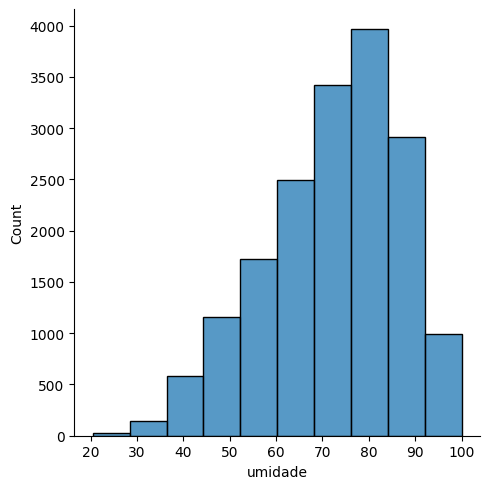

In [19]:
sns.displot(df_limpo, x='umidade', bins=10)
plt.show()

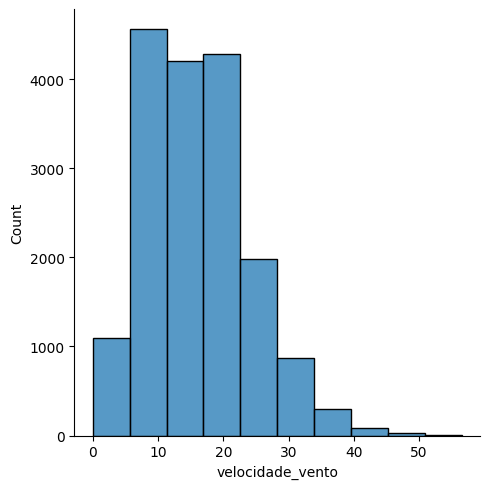

In [20]:
sns.displot(df_limpo, x='velocidade_vento', bins=10)
plt.show()

##Investigando relações entre variáveis

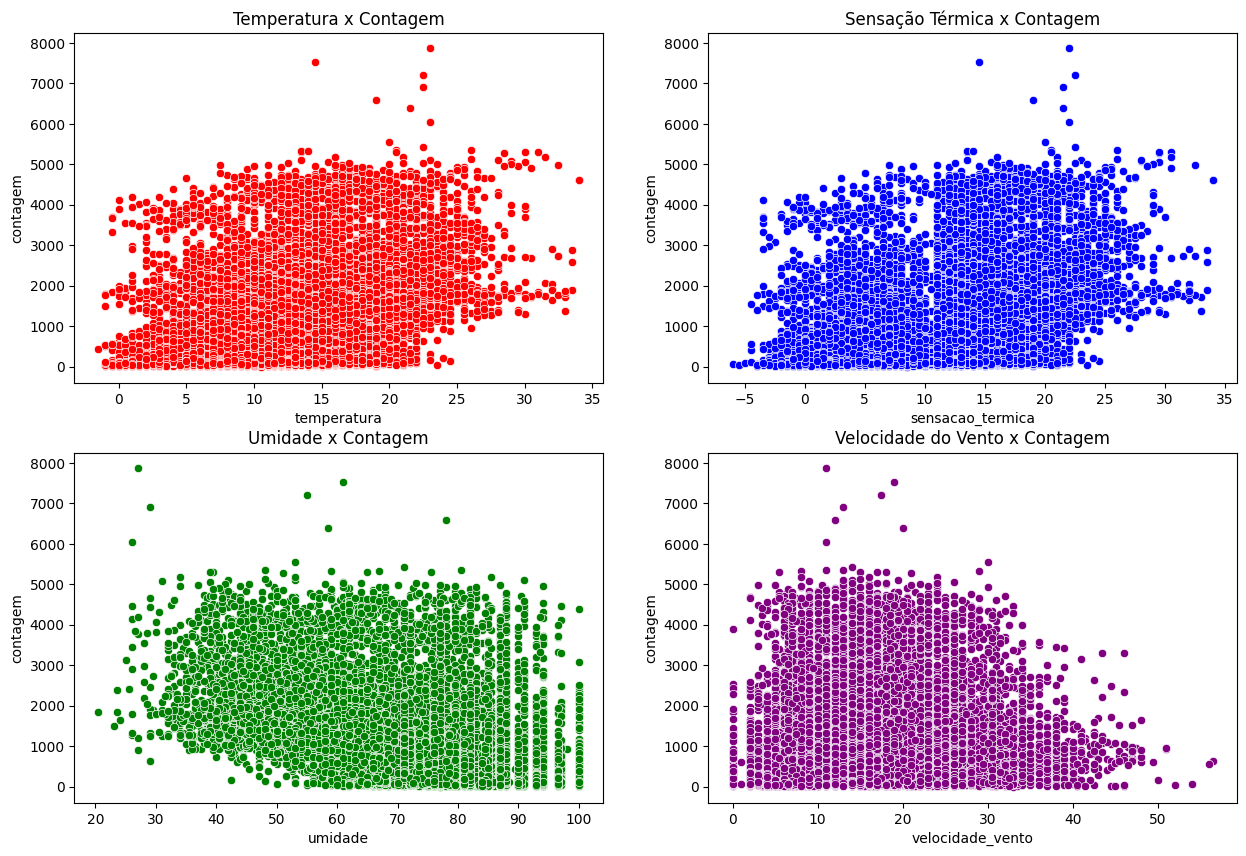

In [21]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))


sns.scatterplot(ax=axes[0, 0], x=df_limpo['temperatura'], y=df_limpo['contagem'], color='red')
axes[0, 0].set_title('Temperatura x Contagem')
sns.scatterplot(ax=axes[0, 1], x=df_limpo['sensacao_termica'], y=df_limpo['contagem'], color='blue')
axes[0, 1].set_title('Sensação Térmica x Contagem')
sns.scatterplot(ax=axes[1, 0], x=df_limpo['umidade'], y=df_limpo['contagem'], color='green')
axes[1, 0].set_title('Umidade x Contagem')
sns.scatterplot(ax=axes[1, 1], x=df_limpo['velocidade_vento'], y=df_limpo['contagem'], color='purple')
axes[1, 1].set_title('Velocidade do Vento x Contagem')


plt.show()


## Examinando a correlação entre as variáveis


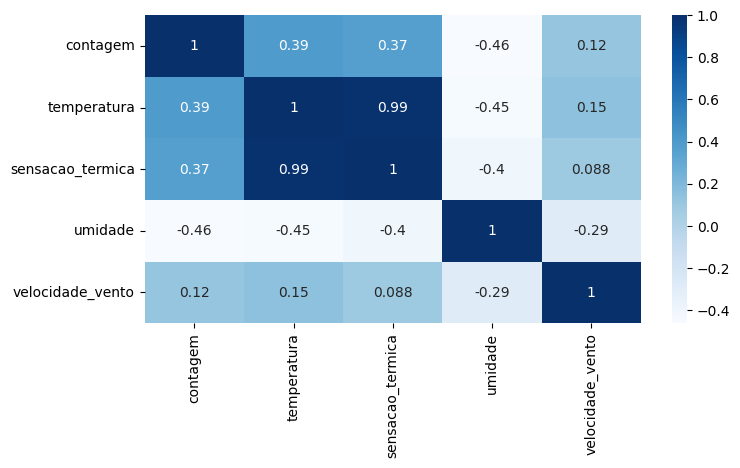

In [22]:
plt.figure(figsize=(8, 4))
sns.heatmap(df_limpo.corr(numeric_only=True), annot=True, cmap='Blues')
plt.show()


## Obtendo estatísticas descritivas

In [23]:
df_limpo.describe(include=[object])

,data_hora,clima,feriado,fim_de_semana,estacao
count,17414,17414,17414,17414,17414
unique,17414,6,2,2,4
top,2015-01-04 00:00:00,Céu limpo,Não,Não,Primavera
freq,1,6150,17030,12444,4394


In [24]:
for col in ['clima', 'feriado', 'fim_de_semana', 'estacao']:
  print(f'Coluna: {col}')
  print(df_limpo[col].unique())
  print('='*15, '\n')


Coluna: clima
['Nublado' 'Céu limpo' 'Parcialmente nublado' 'Chuva leve' 'Neve'
 'Chuva com trovoadas']

Coluna: feriado
['Não' 'Sim']

Coluna: fim_de_semana
['Sim' 'Não']

Coluna: estacao
['Inverno' 'Primavera' 'Verão' 'Outono']



### Comparando dias normais, feriados e finais de semana

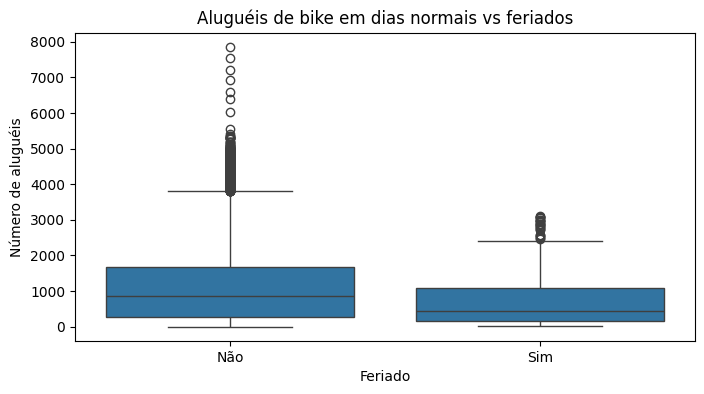

In [25]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='feriado', y='contagem', data=df_limpo)
plt.title('Aluguéis de bike em dias normais vs feriados')
plt.xlabel('Feriado')
plt.ylabel('Número de aluguéis')
plt.show()

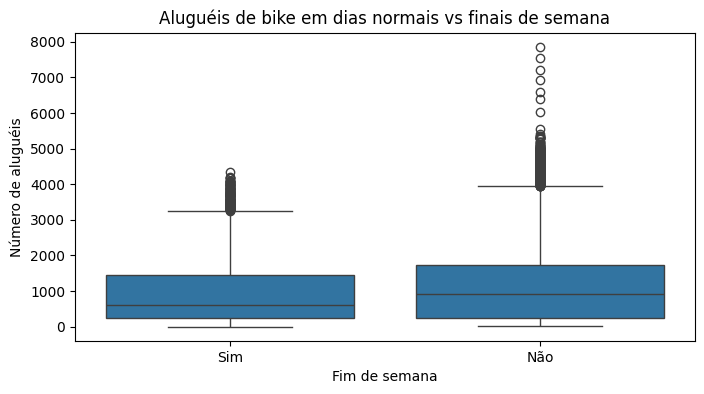

In [26]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='fim_de_semana', y='contagem', data=df_limpo)
plt.title('Aluguéis de bike em dias normais vs finais de semana')
plt.xlabel('Fim de semana')
plt.ylabel('Número de aluguéis')
plt.show()

In [27]:
mediana_feriado = df_limpo.groupby('feriado')['contagem'].median()
mediana_fim_de_semana = df_limpo.groupby('fim_de_semana')['contagem'].median()
print(mediana_feriado)
print(mediana_fim_de_semana)

feriado
Não    855.0
Sim    439.5
Name: contagem, dtype: float64
fim_de_semana
Não    927.0
Sim    619.0
Name: contagem, dtype: float64


### Investigando como o clima afeta a demanda

In [28]:
df_clima = df_limpo.groupby('clima')['contagem'].sum().reset_index().sort_values(by='contagem', ascending=False)
df_clima


,clima,contagem
2,Céu limpo,7146847
5,Parcialmente nublado,6965558
4,Nublado,4243887
1,Chuva leve,1526461
3,Neve,15051
0,Chuva com trovoadas,8168


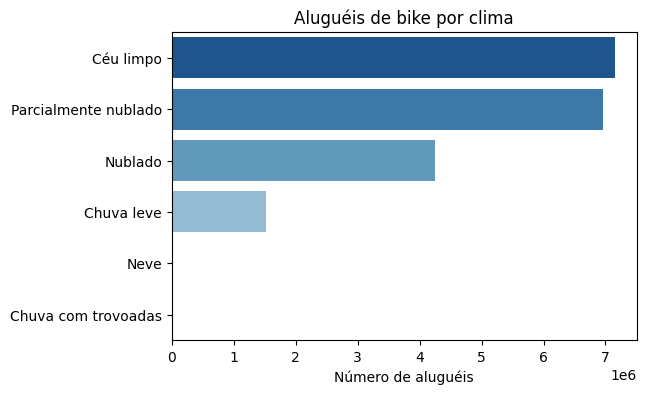

In [29]:
plt.figure(figsize=(6, 4))
sns.barplot(data = df_clima, y='clima', x='contagem', hue='clima', palette='Blues_r', orient='h')
plt.title('Aluguéis de bike por clima')
plt.xlabel('Número de aluguéis')
plt.ylabel('')
plt.show()


### Analisando as distribuições por estação


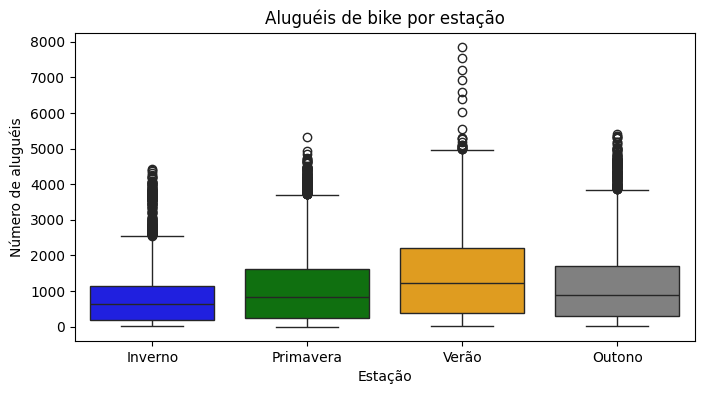

In [30]:
plt.figure(figsize=(8, 4))
paleta_de_cores = {'Primavera': 'green', 'Verão': 'orange', 'Outono': 'grey', 'Inverno': 'blue'}
sns.boxplot(x='estacao', y='contagem', data=df_limpo, hue='estacao', palette=paleta_de_cores)
plt.title('Aluguéis de bike por estação')
plt.xlabel('Estação')
plt.ylabel('Número de aluguéis')
plt.show()

In [31]:
df_limpo.groupby('estacao')['contagem'].median()


estacao
Inverno       632.0
Outono        898.0
Primavera     823.0
Verão        1214.0
Name: contagem, dtype: float64

In [32]:
from scipy.stats import mannwhitneyu

primavera = df_limpo[df_limpo ['estacao'] == 'Primavera']['contagem']
outono = df_limpo[df_limpo ['estacao'] == 'Outono']['contagem']

u_statistic, p_value = mannwhitneyu(primavera, outono, alternative='two-sided')

print(f'Estatística U: {u_statistic}')
print(f'Valor P: {p_value}')

Estatística U: 9044682.5
Valor P: 0.0004762100221646296


# Convertendo tipos de dados


In [33]:
df_limpo.info()


<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data_hora         17414 non-null  object 
 1   contagem          17414 non-null  int64  
 2   temperatura       17414 non-null  float64
 3   sensacao_termica  17414 non-null  float64
 4   umidade           17414 non-null  float64
 5   velocidade_vento  17414 non-null  float64
 6   clima             17414 non-null  object 
 7   feriado           17414 non-null  object 
 8   fim_de_semana     17414 non-null  object 
 9   estacao           17414 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 2.0+ MB


In [34]:
df_data = df_limpo.copy()

In [36]:
df_data['data_hora'] = pd.to_datetime(df_data['data_hora'])
df_data.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno


In [49]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   dia               17414 non-null  object 
 1   contagem          17414 non-null  int64  
 2   temperatura       17414 non-null  float64
 3   sensacao_termica  17414 non-null  float64
 4   umidade           17414 non-null  float64
 5   velocidade_vento  17414 non-null  float64
 6   clima             17414 non-null  object 
 7   feriado           17414 non-null  object 
 8   fim_de_semana     17414 non-null  object 
 9   estacao           17414 non-null  object 
 10  mes               17414 non-null  int32  
 11  horario           17414 non-null  int32  
dtypes: float64(4), int32(2), int64(1), object(5)
memory usage: 2.1+ MB


In [51]:
df_data = df_limpo.copy()

In [52]:
df_data['data_hora'] = pd.to_datetime(df_data['data_hora'])
df_data.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno


## Analisando a demanda por horário

In [53]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data_hora         17414 non-null  datetime64[ns]
 1   contagem          17414 non-null  int64         
 2   temperatura       17414 non-null  float64       
 3   sensacao_termica  17414 non-null  float64       
 4   umidade           17414 non-null  float64       
 5   velocidade_vento  17414 non-null  float64       
 6   clima             17414 non-null  object        
 7   feriado           17414 non-null  object        
 8   fim_de_semana     17414 non-null  object        
 9   estacao           17414 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(4)
memory usage: 2.0+ MB


In [55]:
df_data['mes'] = df_data['data_hora'].dt.month
df_data['horario'] = df_data['data_hora'].dt.hour
df_data.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,mes,hora,horario
0,2015-01-04 00:00:00,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno,1,0,0
1,2015-01-04 01:00:00,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno,1,1,1
2,2015-01-04 02:00:00,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno,1,2,2
3,2015-01-04 03:00:00,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno,1,3,3
4,2015-01-04 04:00:00,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno,1,4,4


In [56]:
df_data['data_hora'] = df_data['data_hora'].dt.date
df_data.head()

,data_hora,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,mes,hora,horario
0,2015-01-04,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno,1,0,0
1,2015-01-04,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno,1,1,1
2,2015-01-04,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno,1,2,2
3,2015-01-04,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno,1,3,3
4,2015-01-04,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno,1,4,4


In [57]:
df_data = df_data.rename(columns={'data_hora': 'data'})
df_data.head()

,data,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,mes,hora,horario
0,2015-01-04,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno,1,0,0
1,2015-01-04,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno,1,1,1
2,2015-01-04,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno,1,2,2
3,2015-01-04,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno,1,3,3
4,2015-01-04,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno,1,4,4


In [58]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   data              17414 non-null  object 
 1   contagem          17414 non-null  int64  
 2   temperatura       17414 non-null  float64
 3   sensacao_termica  17414 non-null  float64
 4   umidade           17414 non-null  float64
 5   velocidade_vento  17414 non-null  float64
 6   clima             17414 non-null  object 
 7   feriado           17414 non-null  object 
 8   fim_de_semana     17414 non-null  object 
 9   estacao           17414 non-null  object 
 10  mes               17414 non-null  int32  
 11  hora              17414 non-null  int32  
 12  horario           17414 non-null  int32  
dtypes: float64(4), int32(3), int64(1), object(5)
memory usage: 2.2+ MB


In [59]:
df_data['data'] = pd.to_datetime(df_data['data'])
df_data.head()

,data,contagem,temperatura,sensacao_termica,umidade,velocidade_vento,clima,feriado,fim_de_semana,estacao,mes,hora,horario
0,2015-01-04,182,3.00,2.00,93.0,6.0,Nublado,Não,Sim,Inverno,1,0,0
1,2015-01-04,138,2.75,2.25,93.0,5.0,Céu limpo,Não,Sim,Inverno,1,1,1
2,2015-01-04,134,2.50,2.50,96.5,0.0,Céu limpo,Não,Sim,Inverno,1,2,2
3,2015-01-04,72,2.00,2.00,100.0,0.0,Céu limpo,Não,Sim,Inverno,1,3,3
4,2015-01-04,47,2.00,2.00,93.0,6.5,Céu limpo,Não,Sim,Inverno,1,4,4


In [60]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17414 entries, 0 to 17413
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   data              17414 non-null  datetime64[ns]
 1   contagem          17414 non-null  int64         
 2   temperatura       17414 non-null  float64       
 3   sensacao_termica  17414 non-null  float64       
 4   umidade           17414 non-null  float64       
 5   velocidade_vento  17414 non-null  float64       
 6   clima             17414 non-null  object        
 7   feriado           17414 non-null  object        
 8   fim_de_semana     17414 non-null  object        
 9   estacao           17414 non-null  object        
 10  mes               17414 non-null  int32         
 11  hora              17414 non-null  int32         
 12  horario           17414 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(3), int64(1), object(4)
memory usage: 2.2

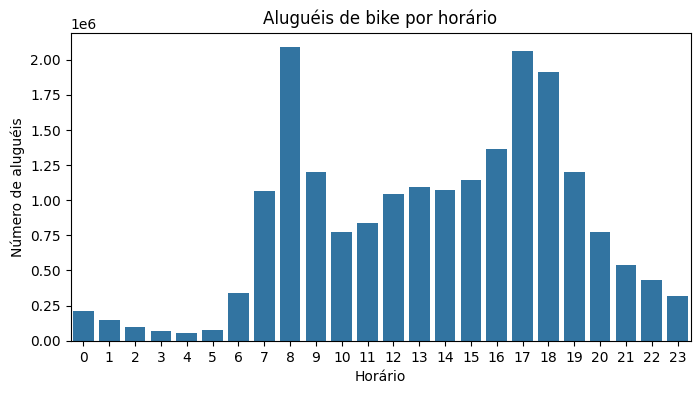

In [63]:
df_por_hora = df_data.groupby('horario')['contagem'].sum().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(x='horario', y='contagem', data=df_por_hora)
plt.title('Aluguéis de bike por horário')
plt.xlabel('Horário')
plt.ylabel('Número de aluguéis')
plt.show()

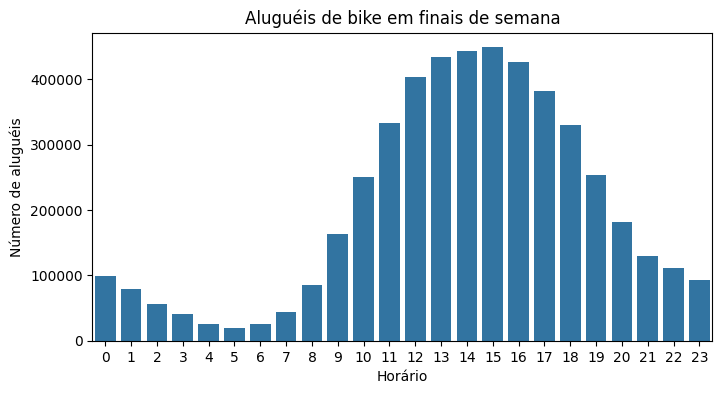

In [64]:
df_fim_de_semana = df_data[df_data['fim_de_semana'] == 'Sim']
alugueis_fim_de_semana = df_fim_de_semana.groupby('horario')['contagem'].sum().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(x='horario', y='contagem', data=alugueis_fim_de_semana)
plt.title('Aluguéis de bike em finais de semana')
plt.xlabel('Horário')
plt.ylabel('Número de aluguéis')
plt.show()

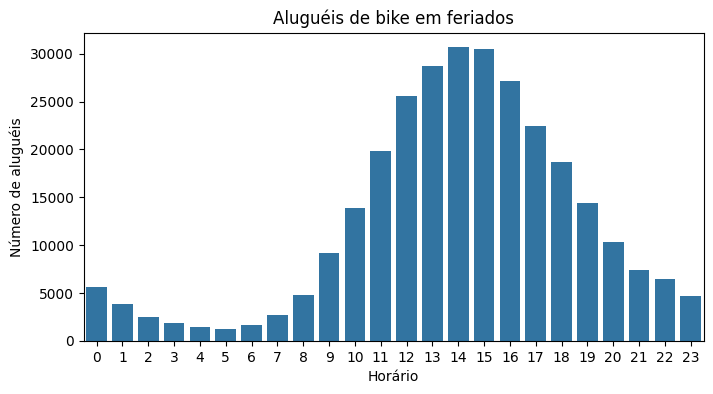

In [65]:
df_feriado = df_data[df_data['feriado'] == 'Sim']
alugueis_feriado = df_feriado.groupby('horario')['contagem'].sum().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(x='horario', y='contagem', data=alugueis_feriado)
plt.title('Aluguéis de bike em feriados')
plt.xlabel('Horário')
plt.ylabel('Número de aluguéis')
plt.show()

## Analisando a demanda por dia e mês

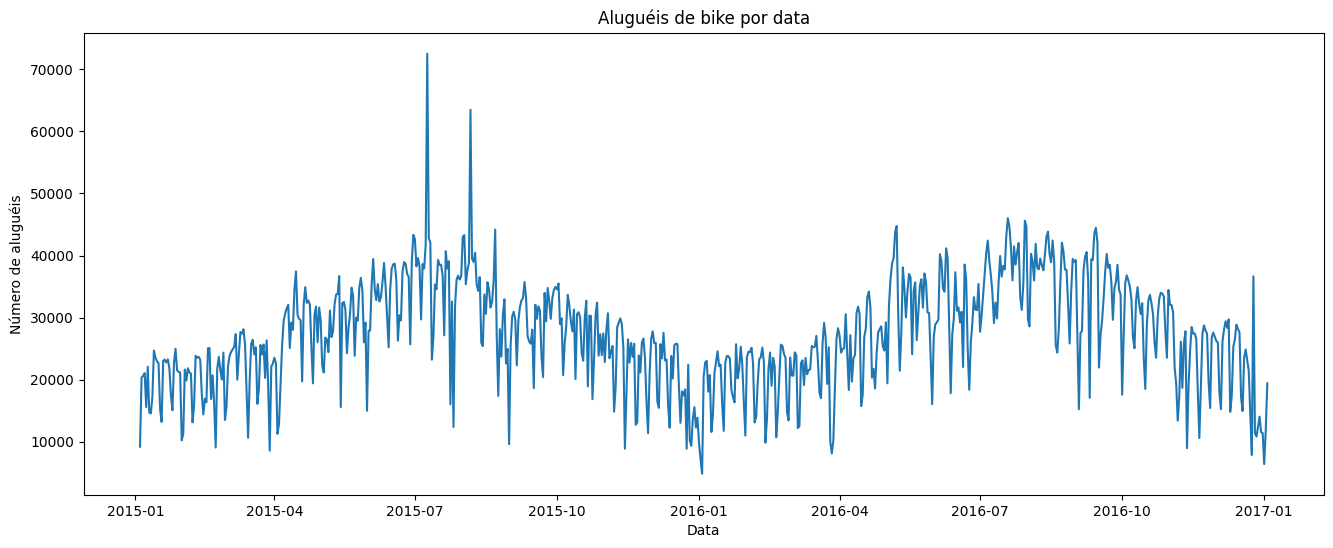

In [75]:
df_tempo = df_data.groupby('data')['contagem'].sum().reset_index()

plt.figure(figsize=(16, 6))
sns.lineplot(x='data', y='contagem', data=df_tempo)
plt.title('Aluguéis de bike por data')
plt.xlabel('Data')
plt.ylabel('Número de aluguéis')
plt.show()

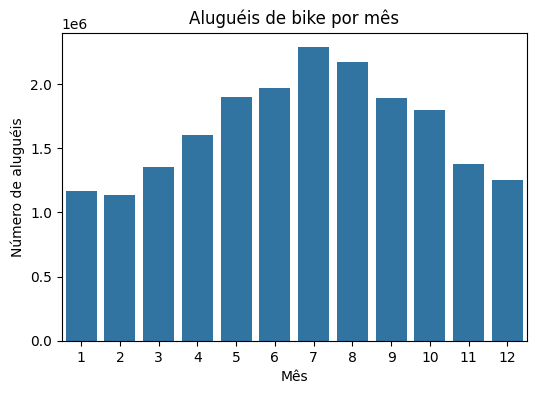

In [78]:
alugueis_mensais = df_data.groupby('mes')['contagem'].sum().reset_index()

plt.figure(figsize=(6, 4))
sns.barplot(x='mes', y='contagem', data=alugueis_mensais)
plt.title('Aluguéis de bike por mês')
plt.xlabel('Mês')
plt.ylabel('Número de aluguéis')
plt.show()

# Realizando a previsão

In [79]:
from prophet import Prophet

In [82]:
df_prophet = df_data[['data', 'contagem']].rename(columns={'data': 'ds', 'contagem': 'y'}) #temos que renomear as colunas pois a biblioteca só reconhece ds e y.
df_prophet = df_prophet.groupby('ds')['y'].sum().reset_index()
df_prophet.head()


,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601


In [88]:
#Semente aleatória
import numpy as np
np.random.seed(4587)

modelo = Prophet() #ideia treinar o modelo com os dados.
modelo.fit(df_prophet)

#criar um data frame que tem as datas futuras para previsão.

df_futuro = modelo.make_future_dataframe(periods=180, freq='D')
previsao = modelo.predict(df_futuro)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb0r04f71/1i620vav.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb0r04f71/a8j6_r1w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12454', 'data', 'file=/tmp/tmpb0r04f71/1i620vav.json', 'init=/tmp/tmpb0r04f71/a8j6_r1w.json', 'output', 'file=/tmp/tmpb0r04f71/prophet_modelgo8987eu/prophet_model-20240704121243.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:12:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:12:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


## Explorando os resultados da previsão

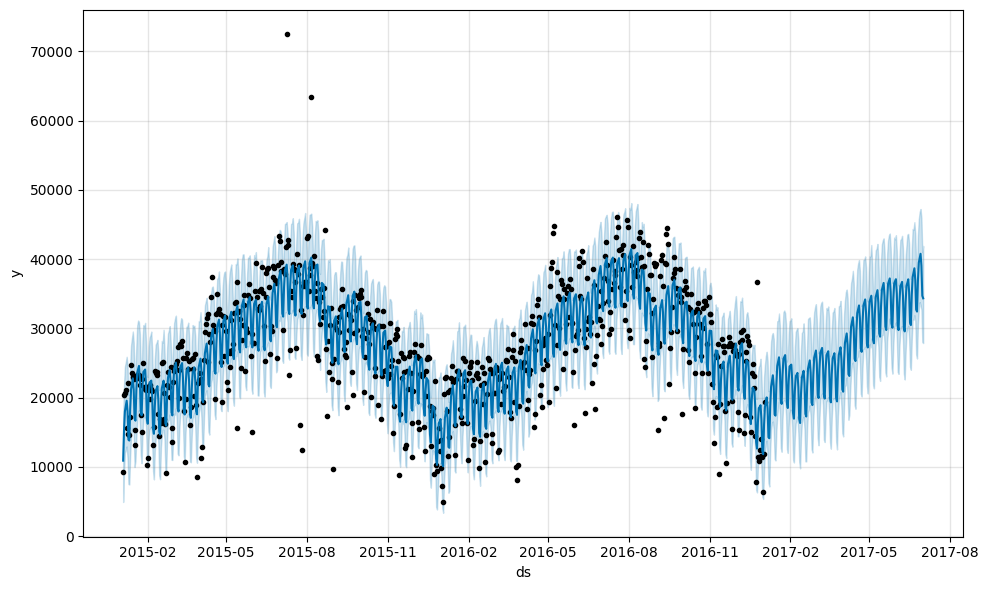

In [89]:
# Como será a previsão? Como podemos explorar isso?
fig1 = modelo.plot(previsao) #o azul mais escuro é a previsão, os pontinhos em preto são os dados reais. Além disso, o azul mais claro é o intervado de confiança. Os pontos mais altos são os outliers.

In [90]:
previsao[['ds', 'yhat', 'yhat_lower', 'yhat_upper']] #yhat = previsão, yhat_lower e upper = intervalo de confiança.

#modelo de regressão aditivo que vai adicionando diferentes componentes para efetuar a previsão.

,ds,yhat,yhat_lower,yhat_upper
0,2015-01-04,10901.148240,4932.361549,17150.858279
1,2015-01-05,15311.232708,9123.342264,21910.559980
2,2015-01-06,18014.350866,12058.884600,24503.524014
3,2015-01-07,18744.719144,12429.514306,25117.930278
4,2015-01-08,19556.191727,12953.200618,25900.627745
...,...,...,...,...
905,2017-06-28,40103.503659,33788.962090,46828.742282
906,2017-06-29,40763.290957,33342.524723,47229.417041
907,2017-06-30,39026.955930,32734.114336,45936.603386
908,2017-07-01,34702.747639,28018.276056,41014.171604


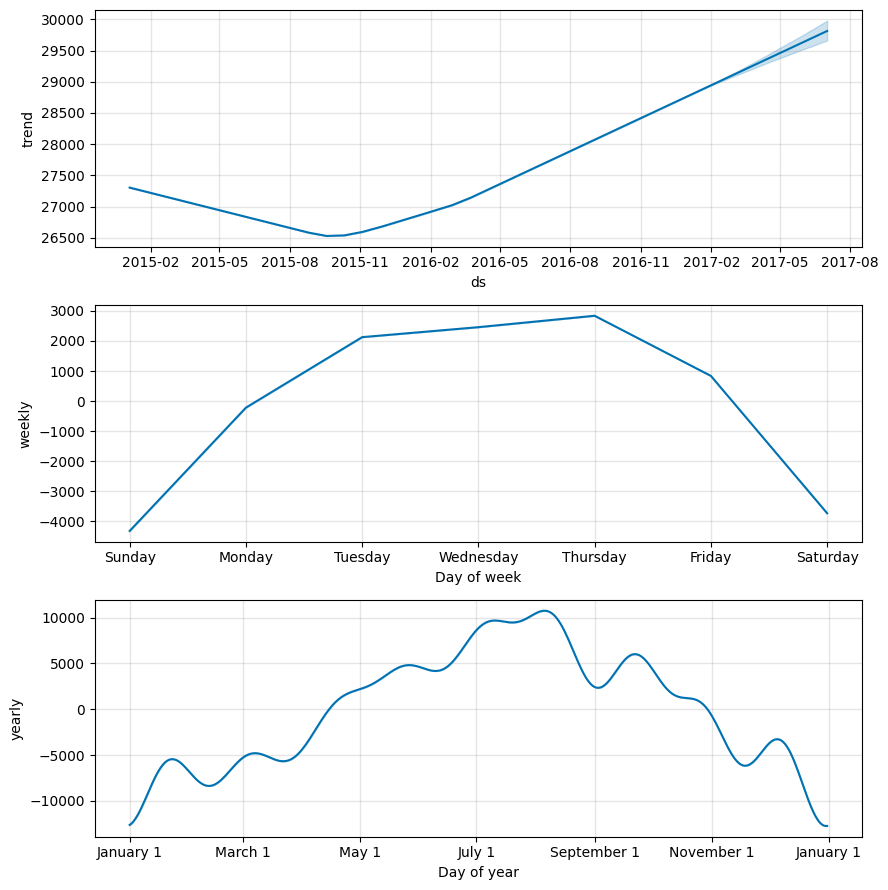

In [91]:
#imprimindo os componentes

fig2 = modelo.plot_components(previsao)

## Separando os dados em treino e teste

In [92]:
#Precisamos treinar o modelo de treino e o modelo de teste

df_prophet.shape

(730, 2)

In [95]:
df_treino = pd.DataFrame()

df_treino['ds'] = df_prophet['ds'][:584]
df_treino['y'] = df_prophet['y'][:584]



In [96]:
df_teste = pd.DataFrame()

df_teste['ds'] = df_prophet['ds'][584:]
df_teste['y'] = df_prophet['y'][584:]

In [97]:
np.random.seed(4587)

modelo = Prophet()
modelo.fit(df_treino)
futuro = modelo.make_future_dataframe(periods=180, freq='D')
previsao = modelo.predict(futuro)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb0r04f71/ndqnbrq1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb0r04f71/jr7jcubx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51557', 'data', 'file=/tmp/tmpb0r04f71/ndqnbrq1.json', 'init=/tmp/tmpb0r04f71/jr7jcubx.json', 'output', 'file=/tmp/tmpb0r04f71/prophet_model0ukvovw3/prophet_model-20240704122733.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:27:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:27:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


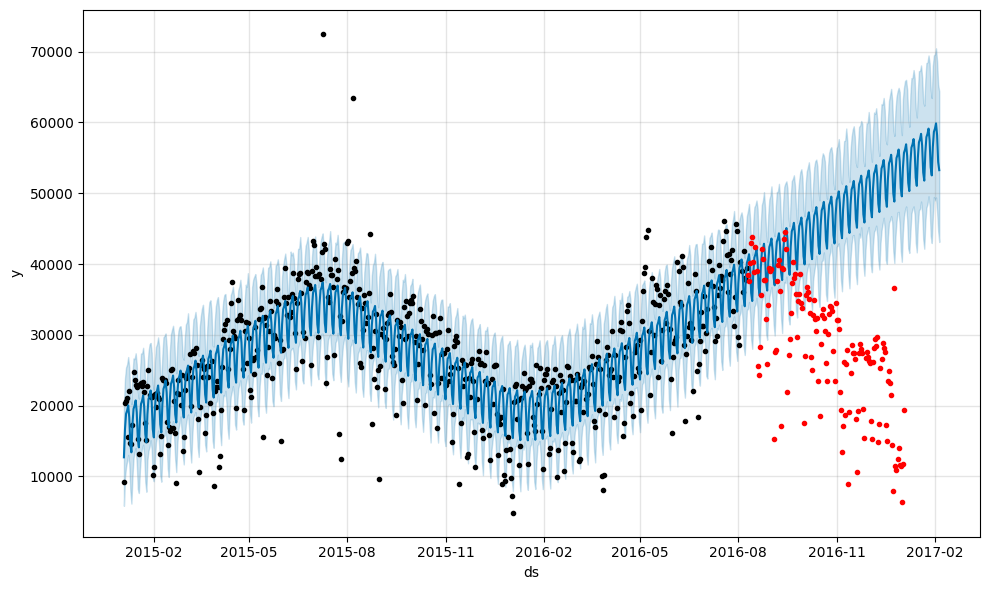

In [99]:
fig1 = modelo.plot(previsao)
plt.plot(df_teste['ds'], df_teste['y'], '.r') #os pontos em vermelho são os dados de teste, porém não se encaixaram na previsão.

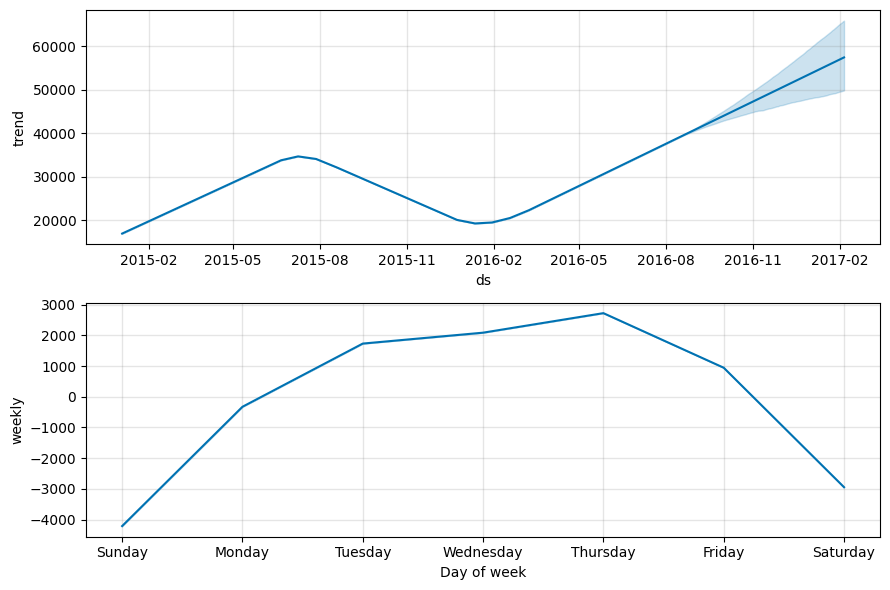

In [100]:
#visualizar o que aconteceu

fig2 = modelo.plot_components(previsao)

## Obtendo métricas

In [102]:
#ober metricas para entender a performance do teste
#estamos trabalhando com series temporais

df_previsao = previsao[['ds', 'yhat']]
df_comparacao = pd.merge(df_previsao, df_teste, on='ds')
df_comparacao


,ds,yhat,y
0,2016-08-10,40646.666399,38430
1,2016-08-11,41387.553580,37626
2,2016-08-12,39717.735888,40159
3,2016-08-13,35936.820545,43041
4,2016-08-14,34777.785741,43848
...,...,...,...
141,2016-12-30,54505.511686,11566
142,2016-12-31,50724.596343,11424
143,2017-01-01,49565.561539,6421
144,2017-01-02,53551.536790,11823


In [103]:
#metrica MSE (erro, quadratico, medio) = somar (y real - y previsto elevado a 2), dividido por n(numero de observações)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')


MSE: 466132050.6184666
RMSE: 21590.09149166503


### Ajustando os dados

In [104]:
np.random.seed(4587)

modelo = Prophet(yearly_seasonality = True)
modelo.fit(df_treino)
futuro = modelo.make_future_dataframe(periods=180, freq='D')
previsao = modelo.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb0r04f71/7a6kw2pu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb0r04f71/lx6hu3nv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39279', 'data', 'file=/tmp/tmpb0r04f71/7a6kw2pu.json', 'init=/tmp/tmpb0r04f71/lx6hu3nv.json', 'output', 'file=/tmp/tmpb0r04f71/prophet_modeltethug5k/prophet_model-20240704125631.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:56:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:56:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


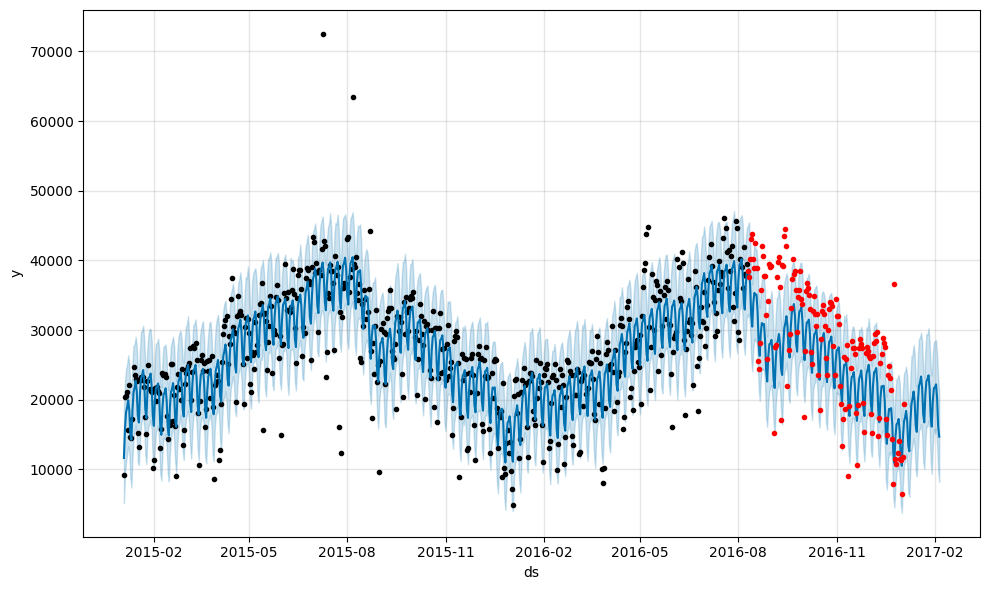

In [105]:
fig1 = modelo.plot(previsao)
plt.plot(df_teste['ds'], df_teste['y'], '.r')

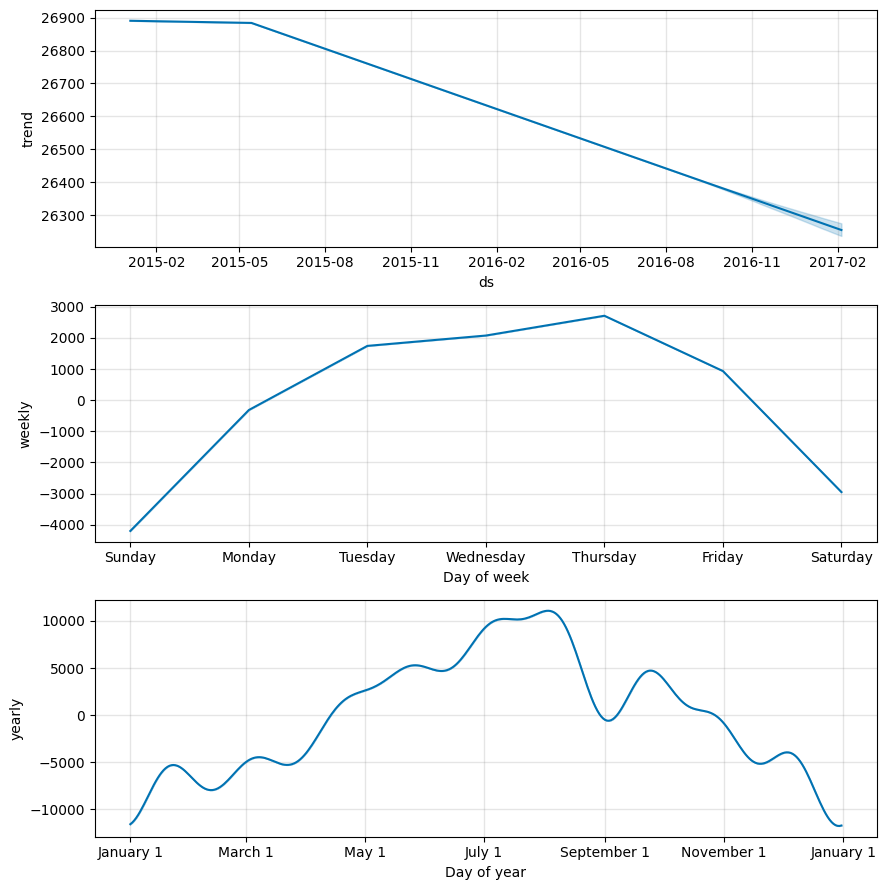

In [106]:
fig2 = modelo.plot_components(previsao)

In [107]:
df_previsao = previsao[['ds', 'yhat']]
df_comparacao = pd.merge(df_previsao, df_teste, on='ds')
df_comparacao

,ds,yhat,y
0,2016-08-10,38465.369605,38430
1,2016-08-11,38747.157010,37626
2,2016-08-12,36570.384861,40159
3,2016-08-13,32236.934232,43041
4,2016-08-14,30495.324496,43848
...,...,...,...
141,2016-12-30,15472.686807,11566
142,2016-12-31,11648.789994,11424
143,2017-01-01,10517.646095,6421
144,2017-01-02,14573.011741,11823


In [108]:
mse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MSE: 38623883.499975376
RMSE: 6214.8116222437


## Tratando os outliers

In [109]:
# remover os outliers

df_prophet

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
725,2016-12-30,11566
726,2016-12-31,11424
727,2017-01-01,6421
728,2017-01-02,11823


In [110]:
np.random.seed(4587)

modelo = Prophet()
modelo.fit(df_prophet)
futuro = modelo.make_future_dataframe(periods=0)
previsao = modelo.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb0r04f71/x_xfrdd0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb0r04f71/tv8cktbt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=24989', 'data', 'file=/tmp/tmpb0r04f71/x_xfrdd0.json', 'init=/tmp/tmpb0r04f71/tv8cktbt.json', 'output', 'file=/tmp/tmpb0r04f71/prophet_model4czqebmm/prophet_model-20240704130816.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:08:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:08:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [113]:
sem_outliers = df_prophet[(df_prophet['y'] > previsao['yhat_lower']) & (df_prophet['y'] < previsao['yhat_upper'])]

In [114]:
sem_outliers

,ds,y
0,2015-01-04,9234
1,2015-01-05,20372
2,2015-01-06,20613
3,2015-01-07,21064
4,2015-01-08,15601
...,...,...
725,2016-12-30,11566
726,2016-12-31,11424
727,2017-01-01,6421
728,2017-01-02,11823


In [115]:
df_treino = pd.DataFrame()

df_treino['ds'] = sem_outliers['ds'][:505]
df_treino['y'] = sem_outliers['y'][:505]

In [116]:
df_teste = pd.DataFrame()

df_teste['ds'] = sem_outliers['ds'][505:]
df_teste['y'] = sem_outliers['y'][505:]

### Treinando com os dados tratados

In [117]:
np.random.seed(4587)

modelo_sem_outliers = Prophet(yearly_seasonality=True)
modelo_sem_outliers.fit(df_treino)
futuro = modelo_sem_outliers.make_future_dataframe(periods=150, freq='D')
previsao = modelo_sem_outliers.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb0r04f71/m8sm3sn_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb0r04f71/a8ph95l8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97442', 'data', 'file=/tmp/tmpb0r04f71/m8sm3sn_.json', 'init=/tmp/tmpb0r04f71/a8ph95l8.json', 'output', 'file=/tmp/tmpb0r04f71/prophet_modelr2xoo73p/prophet_model-20240704131834.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:18:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:18:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


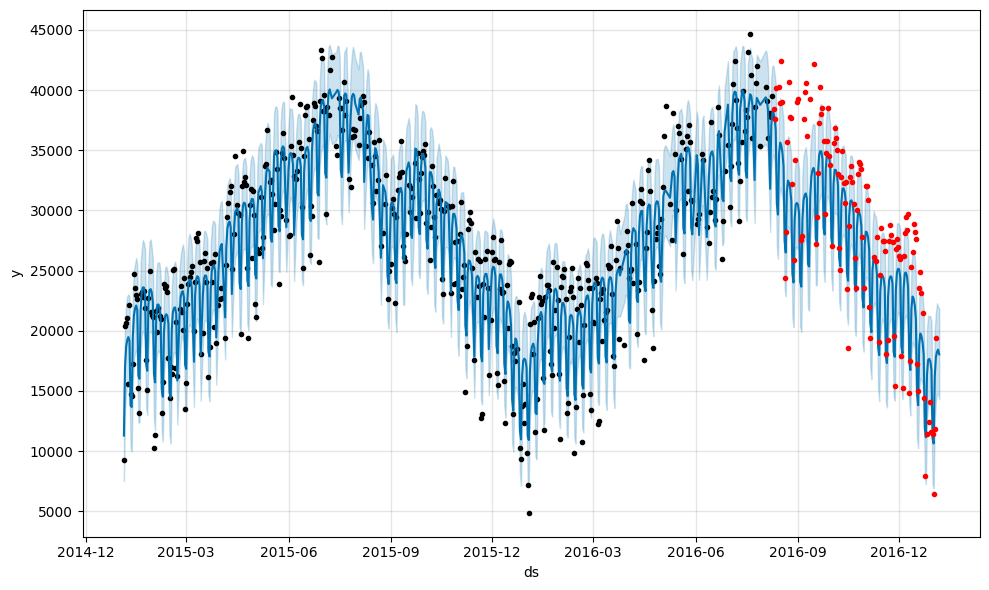

In [118]:
fig1 = modelo_sem_outliers.plot(previsao)
plt.plot(df_teste['ds'], df_teste['y'], '.r')

In [119]:
df_previsao = previsao[['ds', 'yhat']]
df_comparacao = pd.merge(df_previsao, df_teste, on='ds')
df_comparacao

,ds,yhat,y
0,2016-08-10,38124.205916,38430
1,2016-08-11,37708.703632,37626
2,2016-08-12,36664.046726,40159
3,2016-08-15,34692.056037,40236
4,2016-08-16,35633.113613,38911
...,...,...,...
121,2016-12-30,16752.064183,11566
122,2016-12-31,11045.380016,11424
123,2017-01-01,10626.497538,6421
124,2017-01-02,16230.512446,11823


In [120]:
mse = mean_squared_error(df_comparacao['y'], df_comparacao['yhat'])
rmse = np.sqrt(mse)
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')

MSE: 15672925.764235971
RMSE: 3958.904616713564


## Expandindo o período de previsão

In [121]:
np.random.seed(4587)

modelo_sem_outliers = Prophet(yearly_seasonality=True)
modelo_sem_outliers.fit(df_treino)
futuro = modelo_sem_outliers.make_future_dataframe(periods=365, freq='D')
previsao = modelo_sem_outliers.predict(futuro)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb0r04f71/22qdj23_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpb0r04f71/ggdo9_0_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=35854', 'data', 'file=/tmp/tmpb0r04f71/22qdj23_.json', 'init=/tmp/tmpb0r04f71/ggdo9_0_.json', 'output', 'file=/tmp/tmpb0r04f71/prophet_model70mq33bu/prophet_model-20240704132423.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:24:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:24:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [122]:
from prophet.plot import plot_plotly

In [123]:
fig = plot_plotly(modelo_sem_outliers, previsao)
fig.show()